<a href="https://colab.research.google.com/github/Nonna-nna/Nonna-nna/blob/Image-processing/1_%E5%A4%9A%E5%AD%94%E8%B3%AA%E6%9D%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

黄色の面積を算出するソフトです。
バージョン1はトリミング後のものを使用。

バージョン2以降は次の更新を追加予定。

*   トリミングも一括で処理できる
*   多孔質材のピクセル数も引き算できる




9
前画像の表示


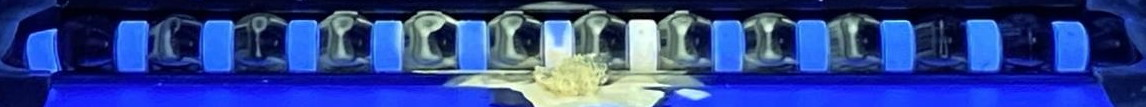

マスク後の画像を表示


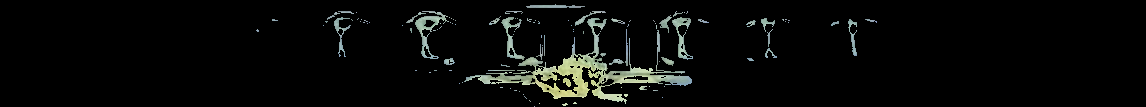

モノクログレースケール画像を表示


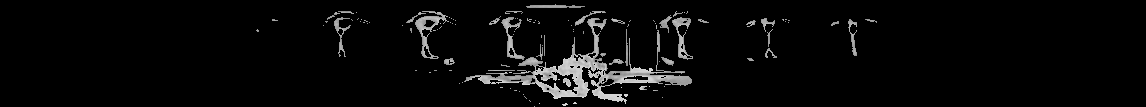

結果を表示


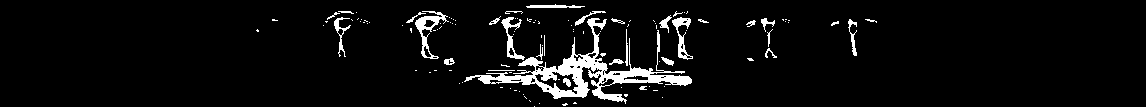

白のピクセル数は 6422
全ピクセル数は 122622
白のピクセルの割合は 5.237233122930633 %
前画像の表示


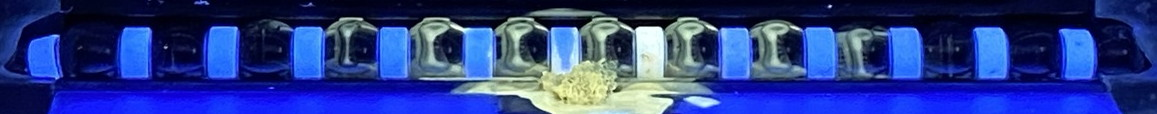

マスク後の画像を表示


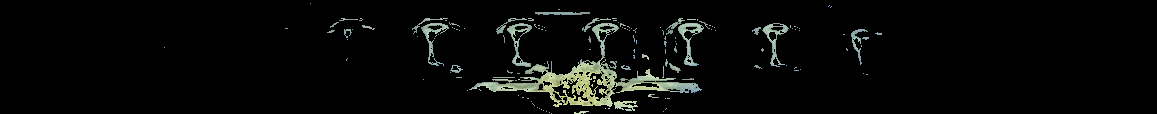

モノクログレースケール画像を表示


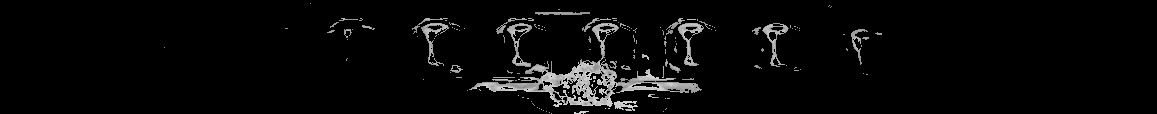

結果を表示


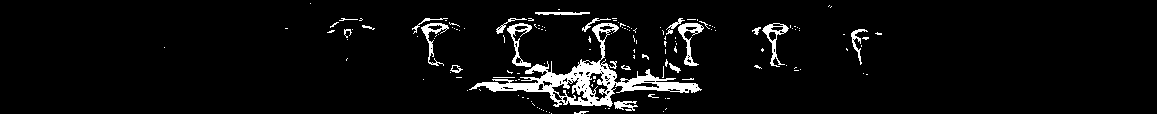

白のピクセル数は 6500
全ピクセル数は 131898
白のピクセルの割合は 4.928050463236743 %
前画像の表示


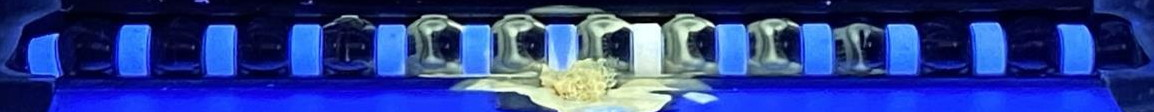

マスク後の画像を表示


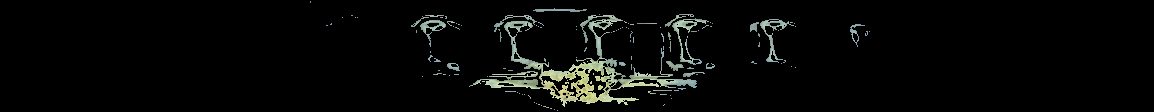

モノクログレースケール画像を表示


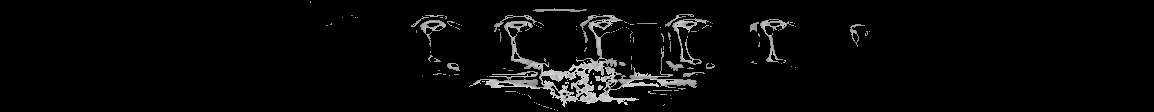

結果を表示


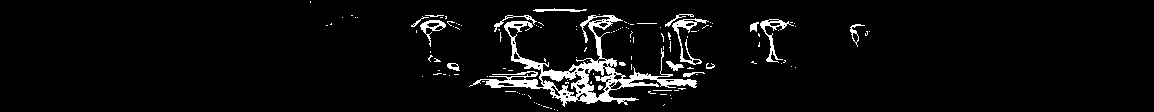

白のピクセル数は 5938
全ピクセル数は 129248
白のピクセルの割合は 4.594268383263183 %
前画像の表示


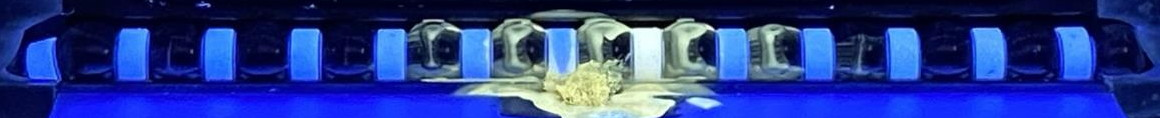

マスク後の画像を表示


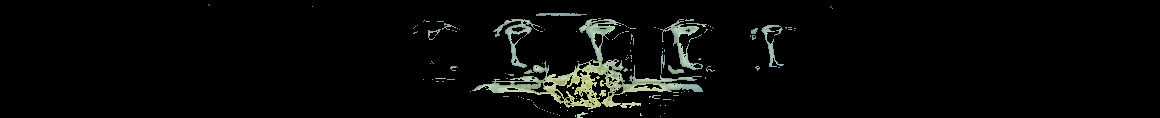

モノクログレースケール画像を表示


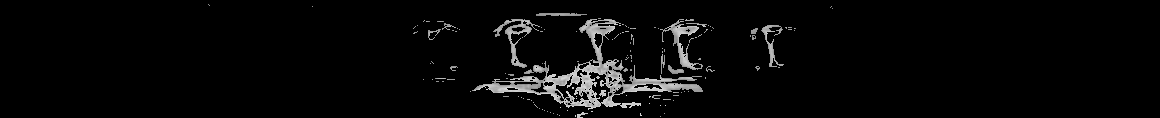

結果を表示


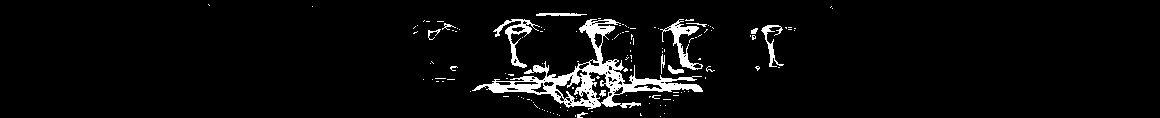

白のピクセル数は 6180
全ピクセル数は 136880
白のピクセルの割合は 4.514903565166569 %
前画像の表示


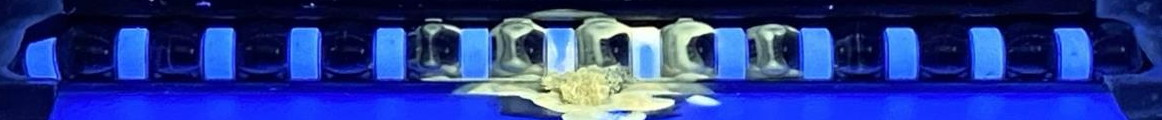

マスク後の画像を表示


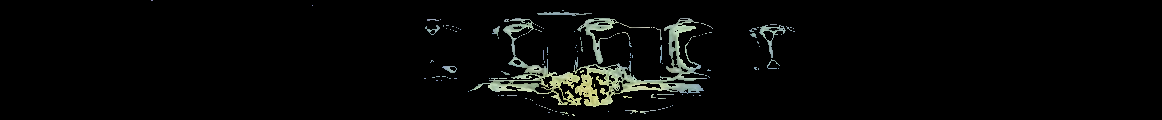

モノクログレースケール画像を表示


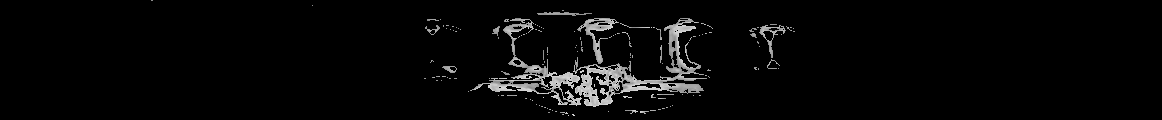

結果を表示


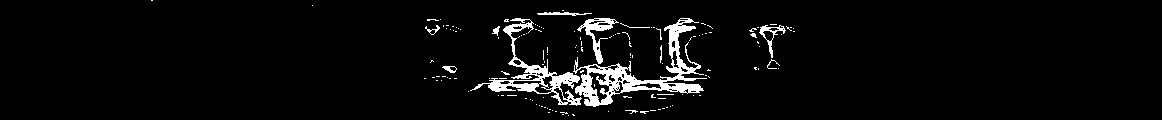

白のピクセル数は 5961
全ピクセル数は 139440
白のピクセルの割合は 4.274956970740104 %
前画像の表示


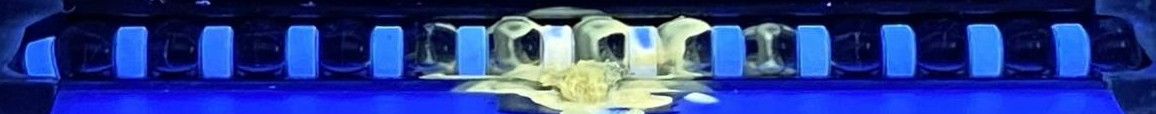

マスク後の画像を表示


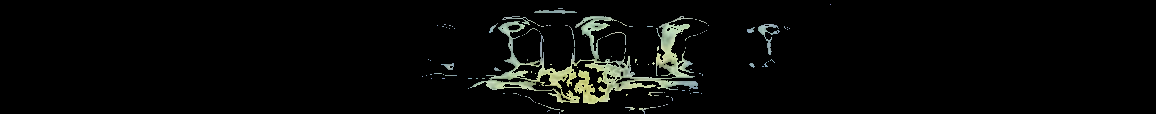

モノクログレースケール画像を表示


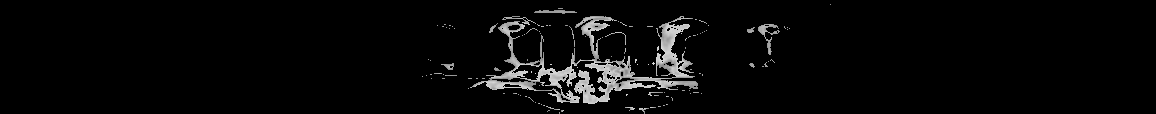

結果を表示


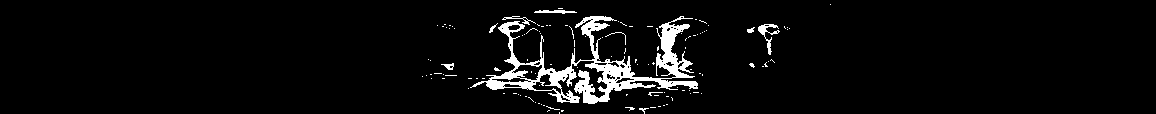

白のピクセル数は 6037
全ピクセル数は 131784
白のピクセルの割合は 4.58098099921083 %
前画像の表示


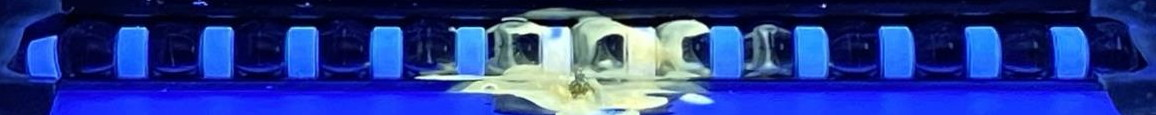

マスク後の画像を表示


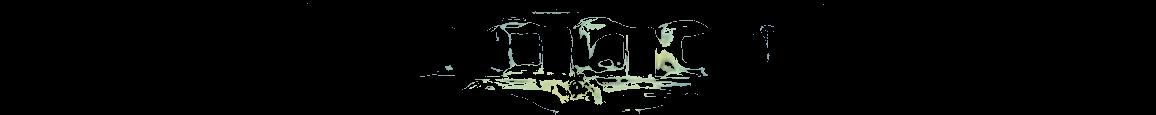

モノクログレースケール画像を表示


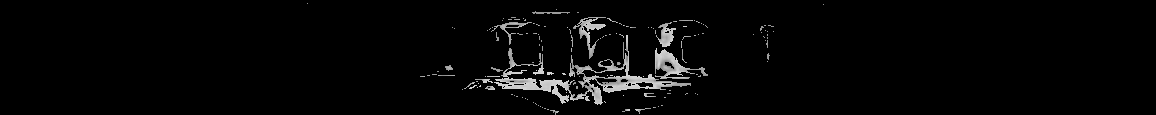

結果を表示


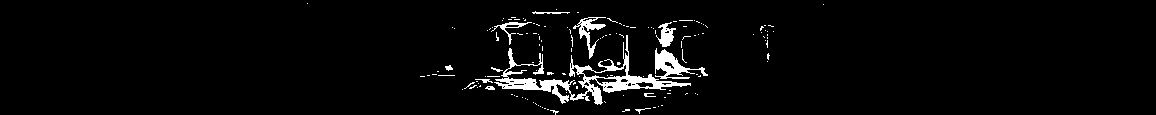

白のピクセル数は 4642
全ピクセル数は 132940
白のピクセルの割合は 3.49180081239657 %
前画像の表示


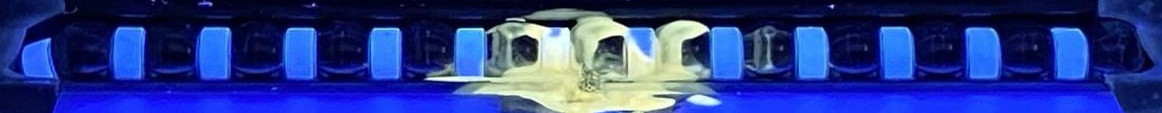

マスク後の画像を表示


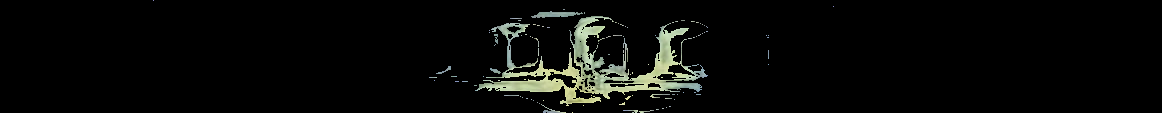

モノクログレースケール画像を表示


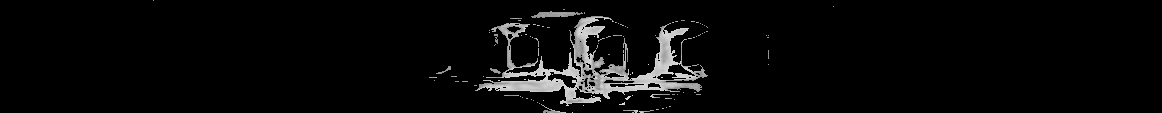

結果を表示


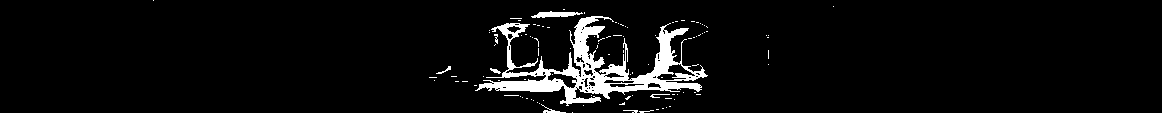

白のピクセル数は 6582
全ピクセル数は 131306
白のピクセルの割合は 5.012718383013723 %
前画像の表示


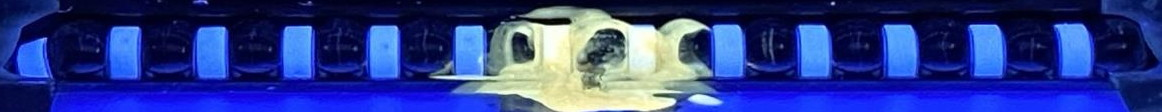

マスク後の画像を表示


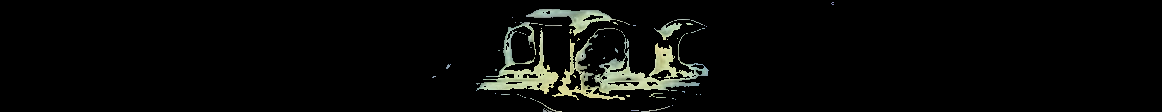

モノクログレースケール画像を表示


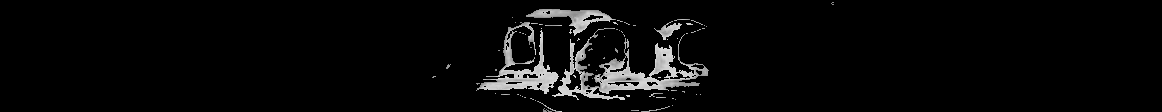

結果を表示


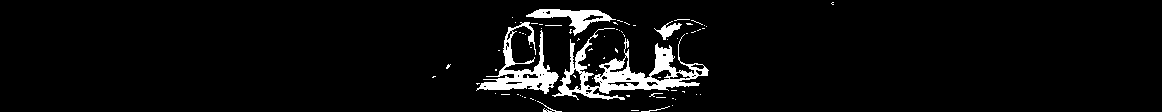

白のピクセル数は 6278
全ピクセル数は 130144
白のピクセルの割合は 4.8238873862798135 %
[5.237233122930633, 4.928050463236743, 4.594268383263183, 4.514903565166569, 4.274956970740104, 4.58098099921083, 3.49180081239657, 5.012718383013723, 4.8238873862798135]


In [3]:
import os
import cv2
import pathlib
import numpy as np
from google.colab.patches import cv2_imshow

'''以下、ファイル数のカウント'''
dir = '/content/drive/Shareddrives/多孔質材班/リテーナあり/多孔質材１個/120°/100%/2 やり直し/resize'
count_file = 0
for file_name in os.listdir(dir):
  #ファイルもしくはディレクトリのパスを取得
  file_path = os.path.join(dir,file_name)
  #ファイルであるか判定
  if os.path.isfile(file_path):
    count_file +=1
print(count_file)

# 保存するファルダ
output_dir = '/content/drive/Shareddrives/西村君の画像/きさげ画像加工後/30-1'

#適用する拡張子
image_list = list(pathlib.Path(dir).glob('**/*.jpg'))

white_ratio_list = []


'''ここにすべての処理を記述'''
for i in range(len(image_list)):
  #前画像の表示
  print("前画像の表示")
  img = cv2.imread(str(image_list[i]))
  cv2_imshow(img)

  #GBR範囲指定
  lower = np.array([96,128,128], dtype=np.uint8)
  upper = np.array([192,224,224], dtype=np.uint8)

  #maskとbitwise_andで黄色い部分を抜いてその他を黒に。
  maskRed = cv2.inRange(img, lower, upper)     
  img_red = cv2.bitwise_and(img,img,  mask= maskRed)

  #マスク後の画像を表示
  print("マスク後の画像を表示")
  cv2_imshow(img_red)

  #グレースケールに変更
  img_gray = cv2.cvtColor(img_red, cv2.COLOR_BGR2GRAY)
  #モノクログレースケール画像を表示
  print("モノクログレースケール画像を表示")
  cv2_imshow(img_gray)

  #二値化
  threshold=83
  ret, image_binary= cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY)
  #結果を表示
  print("結果を表示")
  cv2_imshow(image_binary)

  #白ピクセルのカウント
  white = cv2.countNonZero(image_binary)
  print('白のピクセル数は', white)

  all_pixel = np.size(image_binary)
  #all_pixel = np.size(rbg_image)
  print('全ピクセル数は', all_pixel)
  white_ratio = (white / all_pixel) * 100
  print('白のピクセルの割合は', white_ratio, '%')

  '''以下、配列に入れる'''
  white_ratio_list.append(white_ratio)

  '''以下、保存'''
  output_path = output_dir + '/' + image_list[i].name
  cv2.imwrite(output_path, image_binary)

print(white_ratio_list)


In [4]:
#openpyxl, xlrdをインストール
!pip install openpyxl
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from re import S
import openpyxl
import glob
import pandas as pd

#新規ブック作成
#https://tonari-it.com/python-openpyxl-beginner-make-excel/
wb = openpyxl.Workbook()
sheet = wb.active
sheet.title = 'test_sheet_1'
wb.save('new.xlsx')
glob.glob("*.xlsx")

#書き込み開始
#https://kirinote.com/python_list_writ/
book = openpyxl.load_workbook('/content/new.xlsx')
sheet = book['test_sheet_1']
for i in range(len(white_ratio_list)):
  sheet.cell(i+1,1,value = white_ratio_list[i])

# 保存する
book.save('/content/new.xlsx')

#確認
nf = pd.read_excel('/content/new.xlsx', index_col=0)
print(nf)

Empty DataFrame
Columns: []
Index: [4.928050463236743, 4.594268383263183, 4.514903565166569, 4.274956970740104, 4.58098099921083, 3.49180081239657, 5.012718383013723, 4.823887386279814]
